Roshan Rayala Bhaskar,
Shashank Mysore Girish
[link text](https://)

In [72]:
import tensorflow as tf
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Split training data into training and validation sets
val_split = 0.1  # 10% of the training data will be used for validation
num_val_samples = int(val_split * len(train_images))

val_images = train_images[:num_val_samples]
val_labels = train_labels[:num_val_samples]

train_images = train_images[num_val_samples:]
train_labels = train_labels[num_val_samples:]

print(train_labels)
# Reshape and normalize images
train_images = train_images.reshape(-1, 28, 28, 1).astype(np.float32) / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype(np.float32) / 255

# Convert labels to int32
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)


4422102/4422102 [==============================] - 0s 0us/step
[8 6 4 ... 3 0 5]


In [120]:
# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(10)
])


In [121]:
# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [122]:
# Training
history = model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_data=(val_images, val_labels))


Epoch 1/15
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5992 - accuracy: 0.7783 - val_loss: 46.4228 - val_accuracy: 0.8308
Epoch 2/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3983 - accuracy: 0.8526 - val_loss: 50.3178 - val_accuracy: 0.8013
Epoch 3/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3369 - accuracy: 0.8756 - val_loss: 42.1066 - val_accuracy: 0.8165
Epoch 4/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2975 - accuracy: 0.8896 - val_loss: 80.8567 - val_accuracy: 0.6992
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2692 - accuracy: 0.8990 - val_loss: 59.1096 - val_accuracy: 0.7670
Epoch 6/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2450 - accuracy: 0.9082 - val_loss: 82.5921 - val_accuracy: 0.7353
Epoch 7/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2231 - accuracy: 0.9166 - val_loss: 118.3859 - val_

In [106]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc}")


313/313 - 1s - loss: 0.2925 - accuracy: 0.9127 - 1s/epoch - 4ms/step

Test Accuracy: 0.9126999974250793


In [108]:
# Predictions
predictions = model.predict(test_images)
predictions[9]
np.argmax(predictions[9])


313/313 [==============================] - 1s 2ms/step


7

In [68]:
import matplotlib.pyplot as plt
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

[0 1 2 3 4 5 6 7 8 9]


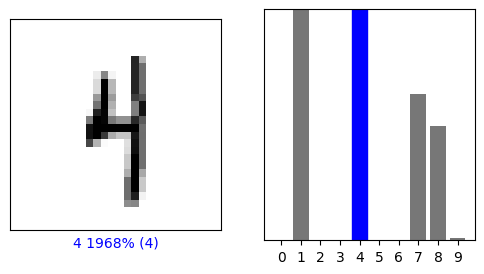

In [69]:
from numpy.ma.extras import unique
class_names = unique(test_labels)
print(class_names)
i = 65
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

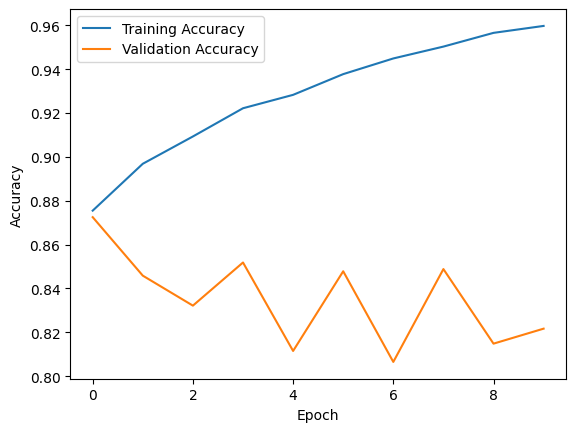

In [105]:
# Plotting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
